In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import mplfinance as mpf
import matplotlib.pyplot as plt
import os
import random
import copy
import time

import torch
import torch.nn as nn
import torch.optim as optim

# Data loading

In [9]:
# Crude Oil : CL=F
# Natural Gas : NG=F
# Gold : GC=F
# Silver : SI=F
# Copper : HG=F
# S&P 500 : ^GSPC
# Dow Jones : ^DJI

ticker = "GC=F"
start = "2023-01-01"
end = "2024-01-01"
interval = "1d"

data = yf.download(ticker, start=start, end=end, interval=interval)
data.columns = data.columns.droplevel(1)  

date_split = "2023-10-01"
data_train = data.loc[:date_split]
data_test = data.loc[date_split:]

[*********************100%***********************]  1 of 1 completed


In [10]:
data

Price,Close,High,Low,Open,Volume
Date,,,,,
2023-01-03,1839.699951,1839.699951,1836.199951,1836.199951,29
2023-01-04,1852.800049,1859.099976,1845.599976,1845.599976,25
2023-01-05,1834.800049,1855.199951,1834.800049,1855.199951,24
2023-01-06,1864.199951,1868.199951,1835.300049,1838.400024,26
2023-01-09,1872.699951,1880.000000,1867.000000,1867.000000,62
...,...,...,...,...,...
2023-12-22,2057.100098,2068.699951,2052.199951,2055.699951,202
2023-12-26,2058.199951,2060.800049,2054.199951,2060.000000,64
2023-12-27,2081.899902,2081.899902,2064.800049,2067.300049,586


# Data exploration

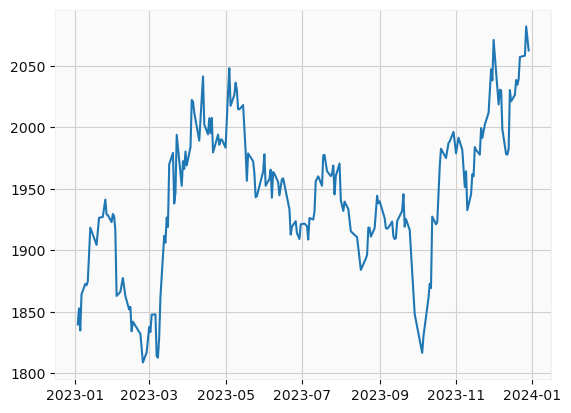

In [11]:
plt.plot(data["Close"])

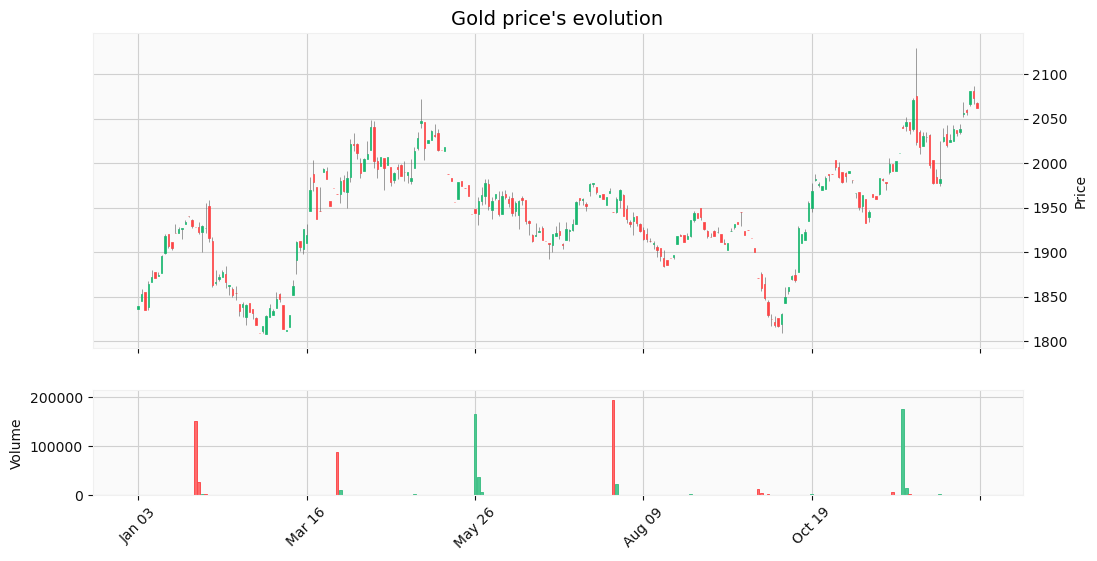

In [12]:
fig, (ax, ax_volume) = plt.subplots(2, figsize=(12, 6), gridspec_kw={'height_ratios': [3, 1]}, sharex=True)

mpf.plot(data, type='candle', style='yahoo', ax=ax, volume=ax_volume)

ax.set_title("Gold price's evolution", fontsize=14)
    
plt.show()
